In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('spam.csv', encoding = 'latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

### Data Cleaning

In [5]:
# let drop unnecessary column

df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#renaming the column to make it more destructve

df=df.rename(columns={'v1':'target','v2':'text'})

In [8]:
df.head(2)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [10]:
# Import label encoder 
from sklearn import preprocessing  
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
df['target']= label_encoder.fit_transform(df['target']) 

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# ham= 0
# spam = 1

In [15]:
#check for missing values

df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
# there are no missing values

In [20]:
#check for the duplicated values

df.duplicated().sum()

403

In [24]:
# there are 403 record duplicated ..which need to delete
df.drop_duplicates(keep='first', inplace=True)

In [25]:
df.duplicated().sum()

0

### EDA==> to understand hidden insights of data

In [26]:
# check for wheather dataset is balanced or not

df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [27]:
# dataset is not balanced

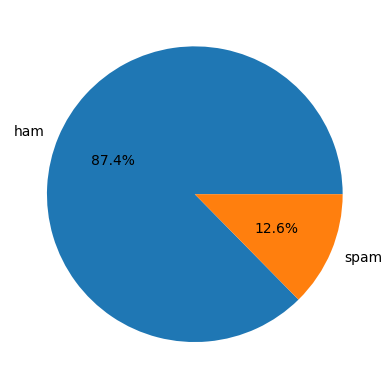

In [51]:
fig, ax = plt.subplots()
ax.pie(df['target'].value_counts(),labels=['ham','spam'] ,autopct = '%1.1f%%')
plt.show()

In [33]:
# almost 13% data is coming from spam whereas 87% data is ham

In [34]:
# # create three columns

# col1- no of chars in text
# col2- no of words in text
# col3- no of sentence in text

In [42]:
import nltk

In [66]:
nltk.download('punkt')  # Download the Punkt tokenizer data (if not already downloaded)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\milind.mali\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [52]:
df['no_of_chars']=df['text'].apply(len)

In [64]:
df['no_of_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [67]:
#no of sentence
df['no_of_sent']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [68]:
df.head(3)

,target,text,no_of_chars,no_of_words,no_of_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2


In [72]:
df[df['target']==0][['no_of_chars','no_of_words','no_of_sent']].describe()

,no_of_chars,no_of_words,no_of_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [76]:
df[df['target']==1][['no_of_chars','no_of_words','no_of_sent']].describe()

,no_of_chars,no_of_words,no_of_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [77]:
# ham messages mean value of each feture is less compared to spam featues...and it is obvious the ham message are direct and short messages often time

### Data preprocessing

In [78]:
# 1.lower casing
# 2.tokenization
# 3.removing special chars
# 4.removing stop words
# 5.stemming

In [128]:
# df['text'][79]

In [136]:
import nltk
nltk.download('stopwords')

import string

from nltk.stem import PorterStemmer

ps = PorterStemmer()

# Now you can use string constants and functions

from nltk.corpus import stopwords

# Now you can use stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\milind.mali\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [139]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [137]:
def transform_text(text):
    text = text.lower()   # to get all the alphabets in lower case
    
    text = nltk.word_tokenize(text)   # seperating all the words using space as separater
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)     # if word is alphabet or numeric then make new list of those words
    
    text = y[:]
    y.clear()   # copy of y
    
    for i in text:    #here text is list of tokens
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)  # again creating new list of elements which are not in stop words nor they are part of punctuation
            
    text = y[:]   # creating copy of y
    y.clear()   # clearing value of y
    
    for i in text:
        y.append(ps.stem(i))  # again append each word in y with applied stem function
    
            
    return " ".join(y)   # join all the elements in y using join function

In [138]:
transform_text("No one is 100% perfect that's why always :-)")

'one 100 perfect alway'

In [145]:
df['transformed_text']=df['text'].apply(transform_text)

In [146]:
df.head(3)

,target,text,no_of_chars,no_of_words,no_of_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...


In [140]:
# which are the most frequently word used in ham and spam

In [150]:
from wordcloud import WordCloud

In [153]:
wc=WordCloud(width=500,height=500,min_font_size=4,background_color='white')

In [155]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=' '))

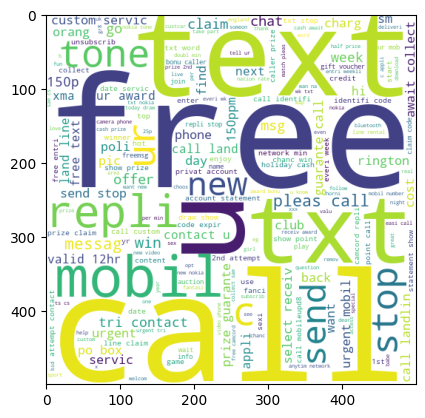

In [156]:
plt.imshow(spam_wc)

In [157]:
# as we can see these are the most frequent keywords we can see in the spam mail or messages like free,please call,valid etc.

In [158]:
# similarly we can see most frequent word used in ham mail

ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))

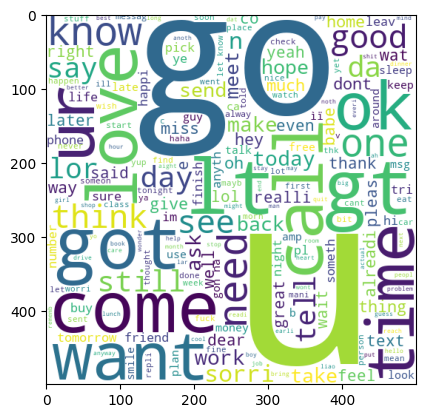

In [159]:
plt.imshow(ham_wc)

In [160]:
# we can also observe the most commanly word used ham mail are very generic word that we use even daily life

In [161]:
# No we will get the list of top 30 words used in each ham and spam

In [174]:
spam_corpus=[]

for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [175]:
len(spam_corpus)

9939

In [179]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [192]:
df_spam_common=pd.DataFrame(Counter(spam_corpus).most_common(30))

In [193]:
df_spam_common.head()

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


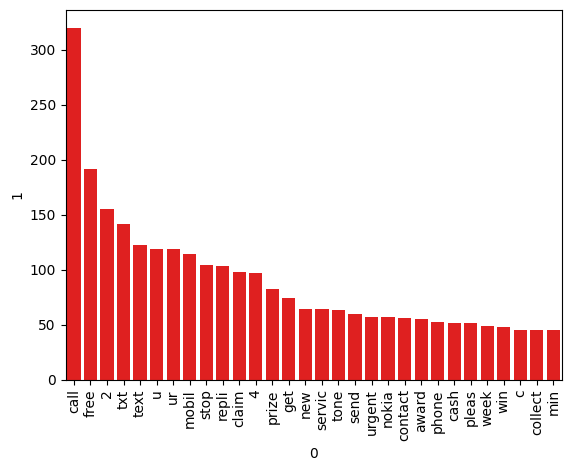

In [206]:
sns.barplot(x=df_spam_common[0],y=df_spam_common[1],data=df_spam_common,color='#FF0000')
plt.xticks(rotation='vertical')
plt.show()

In [183]:
# similary most 30 comman word for ham messages will be
ham_corpus=[]

for msg in df[df['target']==0]['transformed_text'].tolist():   # list of messages in target column
    for word in msg.split():
        ham_corpus.append(word)

In [184]:
len(ham_corpus)

35404

In [186]:
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

In [207]:
# barplot for ham words
df_ham_common=pd.DataFrame(Counter(ham_corpus).most_common(30))

df_ham_common.head(5)

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287


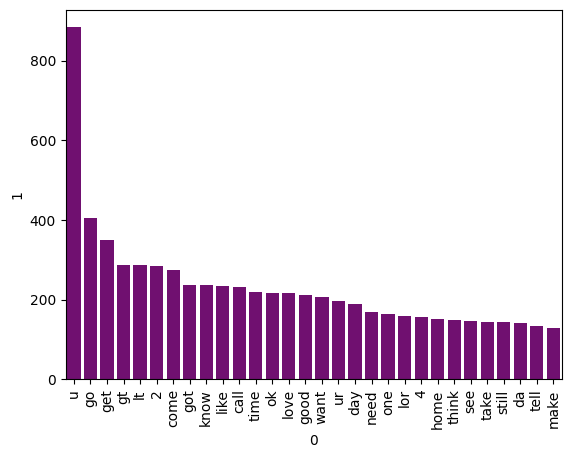

In [209]:
sns.barplot(x=df_ham_common[0],y=df_ham_common[1],data=df_ham_common,color='#800080')
plt.xticks(rotation='vertical')
plt.show()

### Model Building

In [238]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

### Count Vectorizer

In [213]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [215]:
X.shape   # 5169 are the mesg and 6708 are the words

(5169, 6708)

In [218]:
y=df['target'].values

In [219]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [220]:
from sklearn.model_selection import train_test_split

In [221]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)

In [229]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [230]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [235]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)

print('Accuracy score:\n',accuracy_score(y_test,y_pred1))
print('Confusion matrix:\n',confusion_matrix(y_test,y_pred1))
print('Precision score:\n',precision_score(y_test,y_pred1))

Accuracy score:
 0.8636363636363636
Confusion matrix:
 [[782 116]
 [ 25 111]]
Precision score:
 0.4889867841409692


In [236]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)

print('Accuracy score:\n',accuracy_score(y_test,y_pred2))
print('Confusion matrix:\n',confusion_matrix(y_test,y_pred2))
print('Precision score:\n',precision_score(y_test,y_pred2))

Accuracy score:
 0.9700193423597679
Confusion matrix:
 [[881  17]
 [ 14 122]]
Precision score:
 0.8776978417266187


In [237]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)

print('Accuracy score:\n',accuracy_score(y_test,y_pred3))
print('Confusion matrix:\n',confusion_matrix(y_test,y_pred3))
print('Precision score:\n',precision_score(y_test,y_pred3))

Accuracy score:
 0.9729206963249516
Confusion matrix:
 [[897   1]
 [ 27 109]]
Precision score:
 0.990909090909091


### tfidf vectorizer

In [239]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [240]:
X.shape   # 5169 are the mesg and 6708 are the words

(5169, 6708)

In [241]:
y=df['target'].values

In [242]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [243]:
from sklearn.model_selection import train_test_split

In [244]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)

In [245]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [246]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [247]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)

print('Accuracy score:\n',accuracy_score(y_test,y_pred1))
print('Confusion matrix:\n',confusion_matrix(y_test,y_pred1))
print('Precision score:\n',precision_score(y_test,y_pred1))

Accuracy score:
 0.8588007736943907
Confusion matrix:
 [[783 115]
 [ 31 105]]
Precision score:
 0.4772727272727273


In [248]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)

print('Accuracy score:\n',accuracy_score(y_test,y_pred2))
print('Confusion matrix:\n',confusion_matrix(y_test,y_pred2))
print('Precision score:\n',precision_score(y_test,y_pred2))

Accuracy score:
 0.9555125725338491
Confusion matrix:
 [[898   0]
 [ 46  90]]
Precision score:
 1.0


In [250]:
## precision score increase since data is imbalance and this is type 1 error we are more concern with precision score

In [249]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)

print('Accuracy score:\n',accuracy_score(y_test,y_pred3))
print('Confusion matrix:\n',confusion_matrix(y_test,y_pred3))
print('Precision score:\n',precision_score(y_test,y_pred3))

Accuracy score:
 0.9729206963249516
Confusion matrix:
 [[897   1]
 [ 27 109]]
Precision score:
 0.990909090909091


In [251]:
### Importing other algorith for comparisonfrom 

In [253]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [254]:
lrc = LogisticRegression(solver='liblinear', penalty='l1')
svc=SVC(kernel='sigmoid',gamma=0.1)
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
knc=KNeighborsClassifier()
abc=AdaBoostClassifier(n_estimators=50, random_state=2)
rfc=RandomForestClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [256]:
clfs={
    'LR':lrc,
    'SVM':svc,
    'NB':mnb,
    'DT':dtc,
    'KNN':knc,
    'AB':abc,
    'RF':rfc,
    'BC':bc,
    'ETC':etc,
    'GB':gbdt,
    'XG':xgb
}

In [257]:
def train_classifier(clf,X_train,X_test,y_train,y_test):
    clf.fit(X_train,y_train)
    current_pred=clf.predict(X_test)
    
    current_acc=accuracy_score(y_test,current_pred)
    current_prec=precision_score(y_test,current_pred)
    
    return current_acc,current_prec

In [258]:
train_classifier(dtc,X_train,X_test,y_train,y_test)

(0.9361702127659575, 0.8571428571428571)

In [261]:
for name,clf in clfs.items():
    current_acc,current_prec=train_classifier(clf,X_train,X_test,y_train,y_test)
    
    print("for",clf)
    print('Accuracy is :',current_acc)
    print('Precision is:',current_prec)
    print('='*100)

for LogisticRegression(penalty='l1', solver='liblinear')
Accuracy is : 0.9497098646034816
Precision is: 0.8962264150943396
for SVC(gamma=0.1, kernel='sigmoid')
Accuracy is : 0.9187620889748549
Precision is: 0.9642857142857143
for MultinomialNB()
Accuracy is : 0.9555125725338491
Precision is: 1.0
for DecisionTreeClassifier(max_depth=5)
Accuracy is : 0.9342359767891683
Precision is: 0.8469387755102041
for KNeighborsClassifier()
Accuracy is : 0.8994197292069632
Precision is: 1.0
for AdaBoostClassifier(random_state=2)
Accuracy is : 0.960348162475822
Precision is: 0.8991596638655462
for RandomForestClassifier(n_estimators=50, random_state=2)
Accuracy is : 0.9690522243713733
Precision is: 0.9905660377358491
for BaggingClassifier(n_estimators=50, random_state=2)
Accuracy is : 0.9593810444874274
Precision is: 0.8671875
for ExtraTreesClassifier(n_estimators=50, random_state=2)
Accuracy is : 0.9680851063829787
Precision is: 0.9401709401709402
for GradientBoostingClassifier(n_estimators=50, rando

In [262]:
# we can see NB is giving highest accuracy and precison as well

In [265]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))